<a href="https://colab.research.google.com/github/GerardAlba/UdAAnaliticaFinancera/blob/main/UdACreditBucketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [10]:
credit = pd.read_csv('german_credit_data.csv')

In [5]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
del credit['Unnamed: 0']

In [12]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)

In [14]:
numerical_credit = credit.select_dtypes(exclude='O')

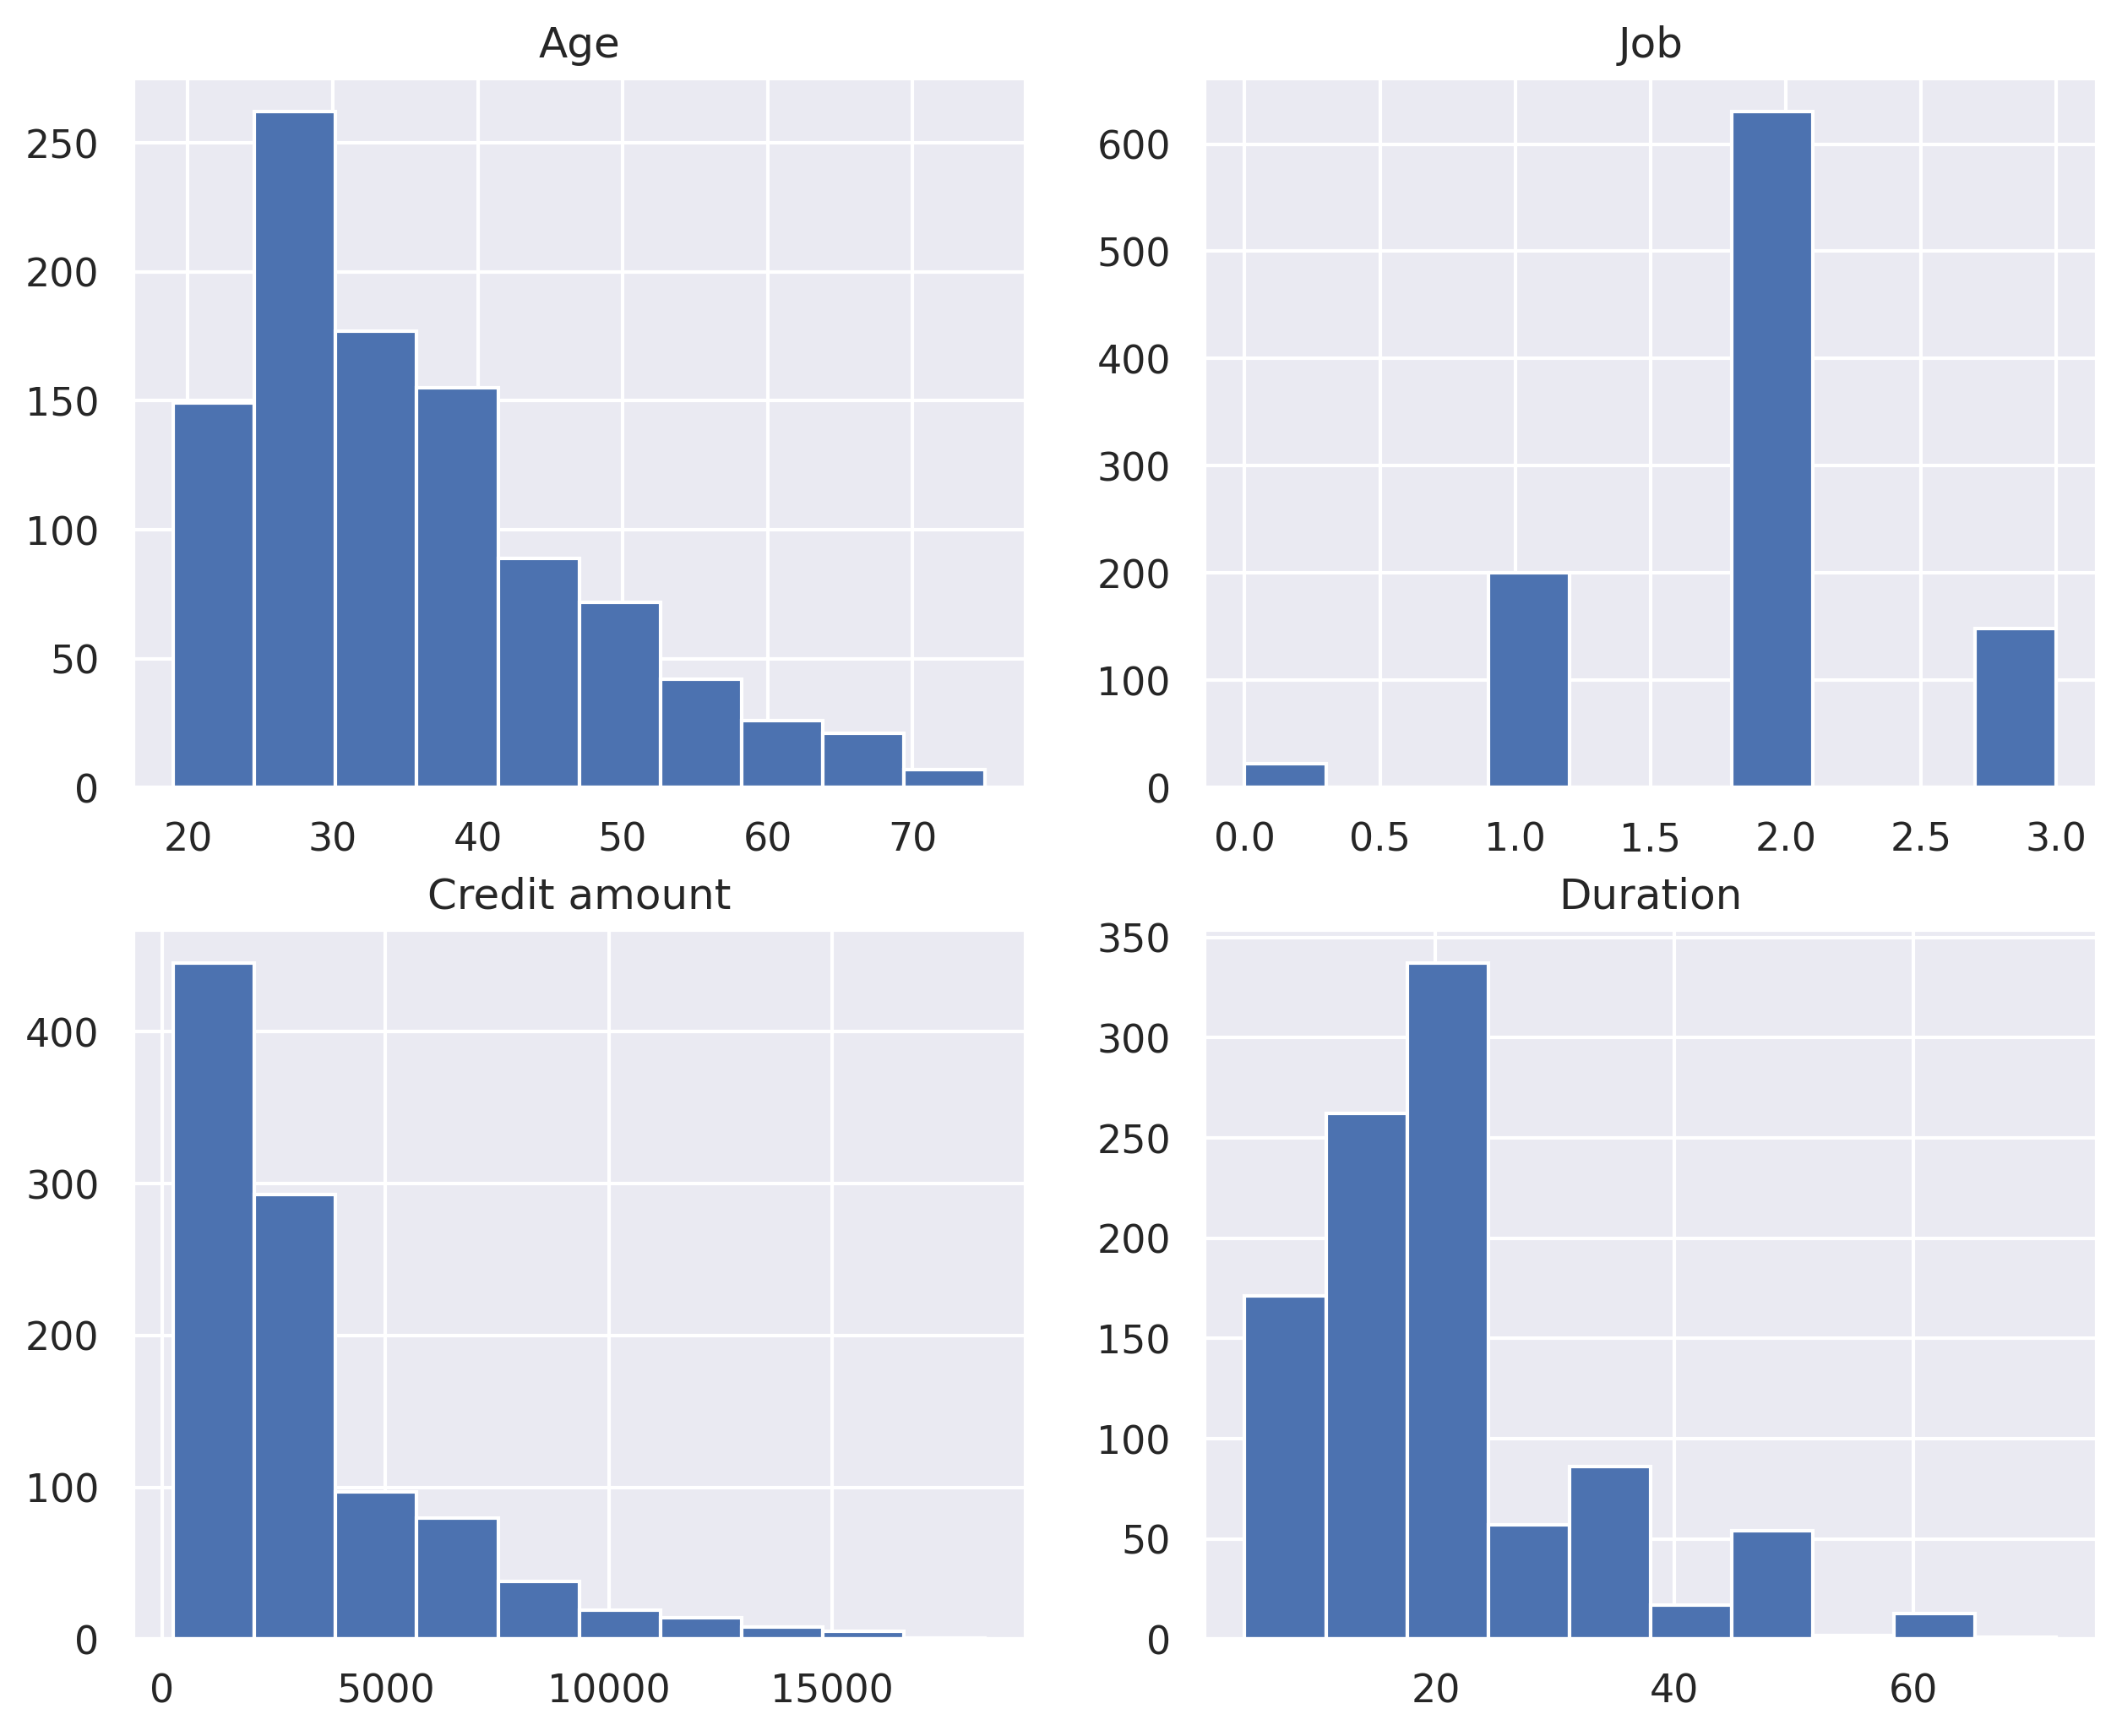

In [15]:
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [17]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [18]:
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

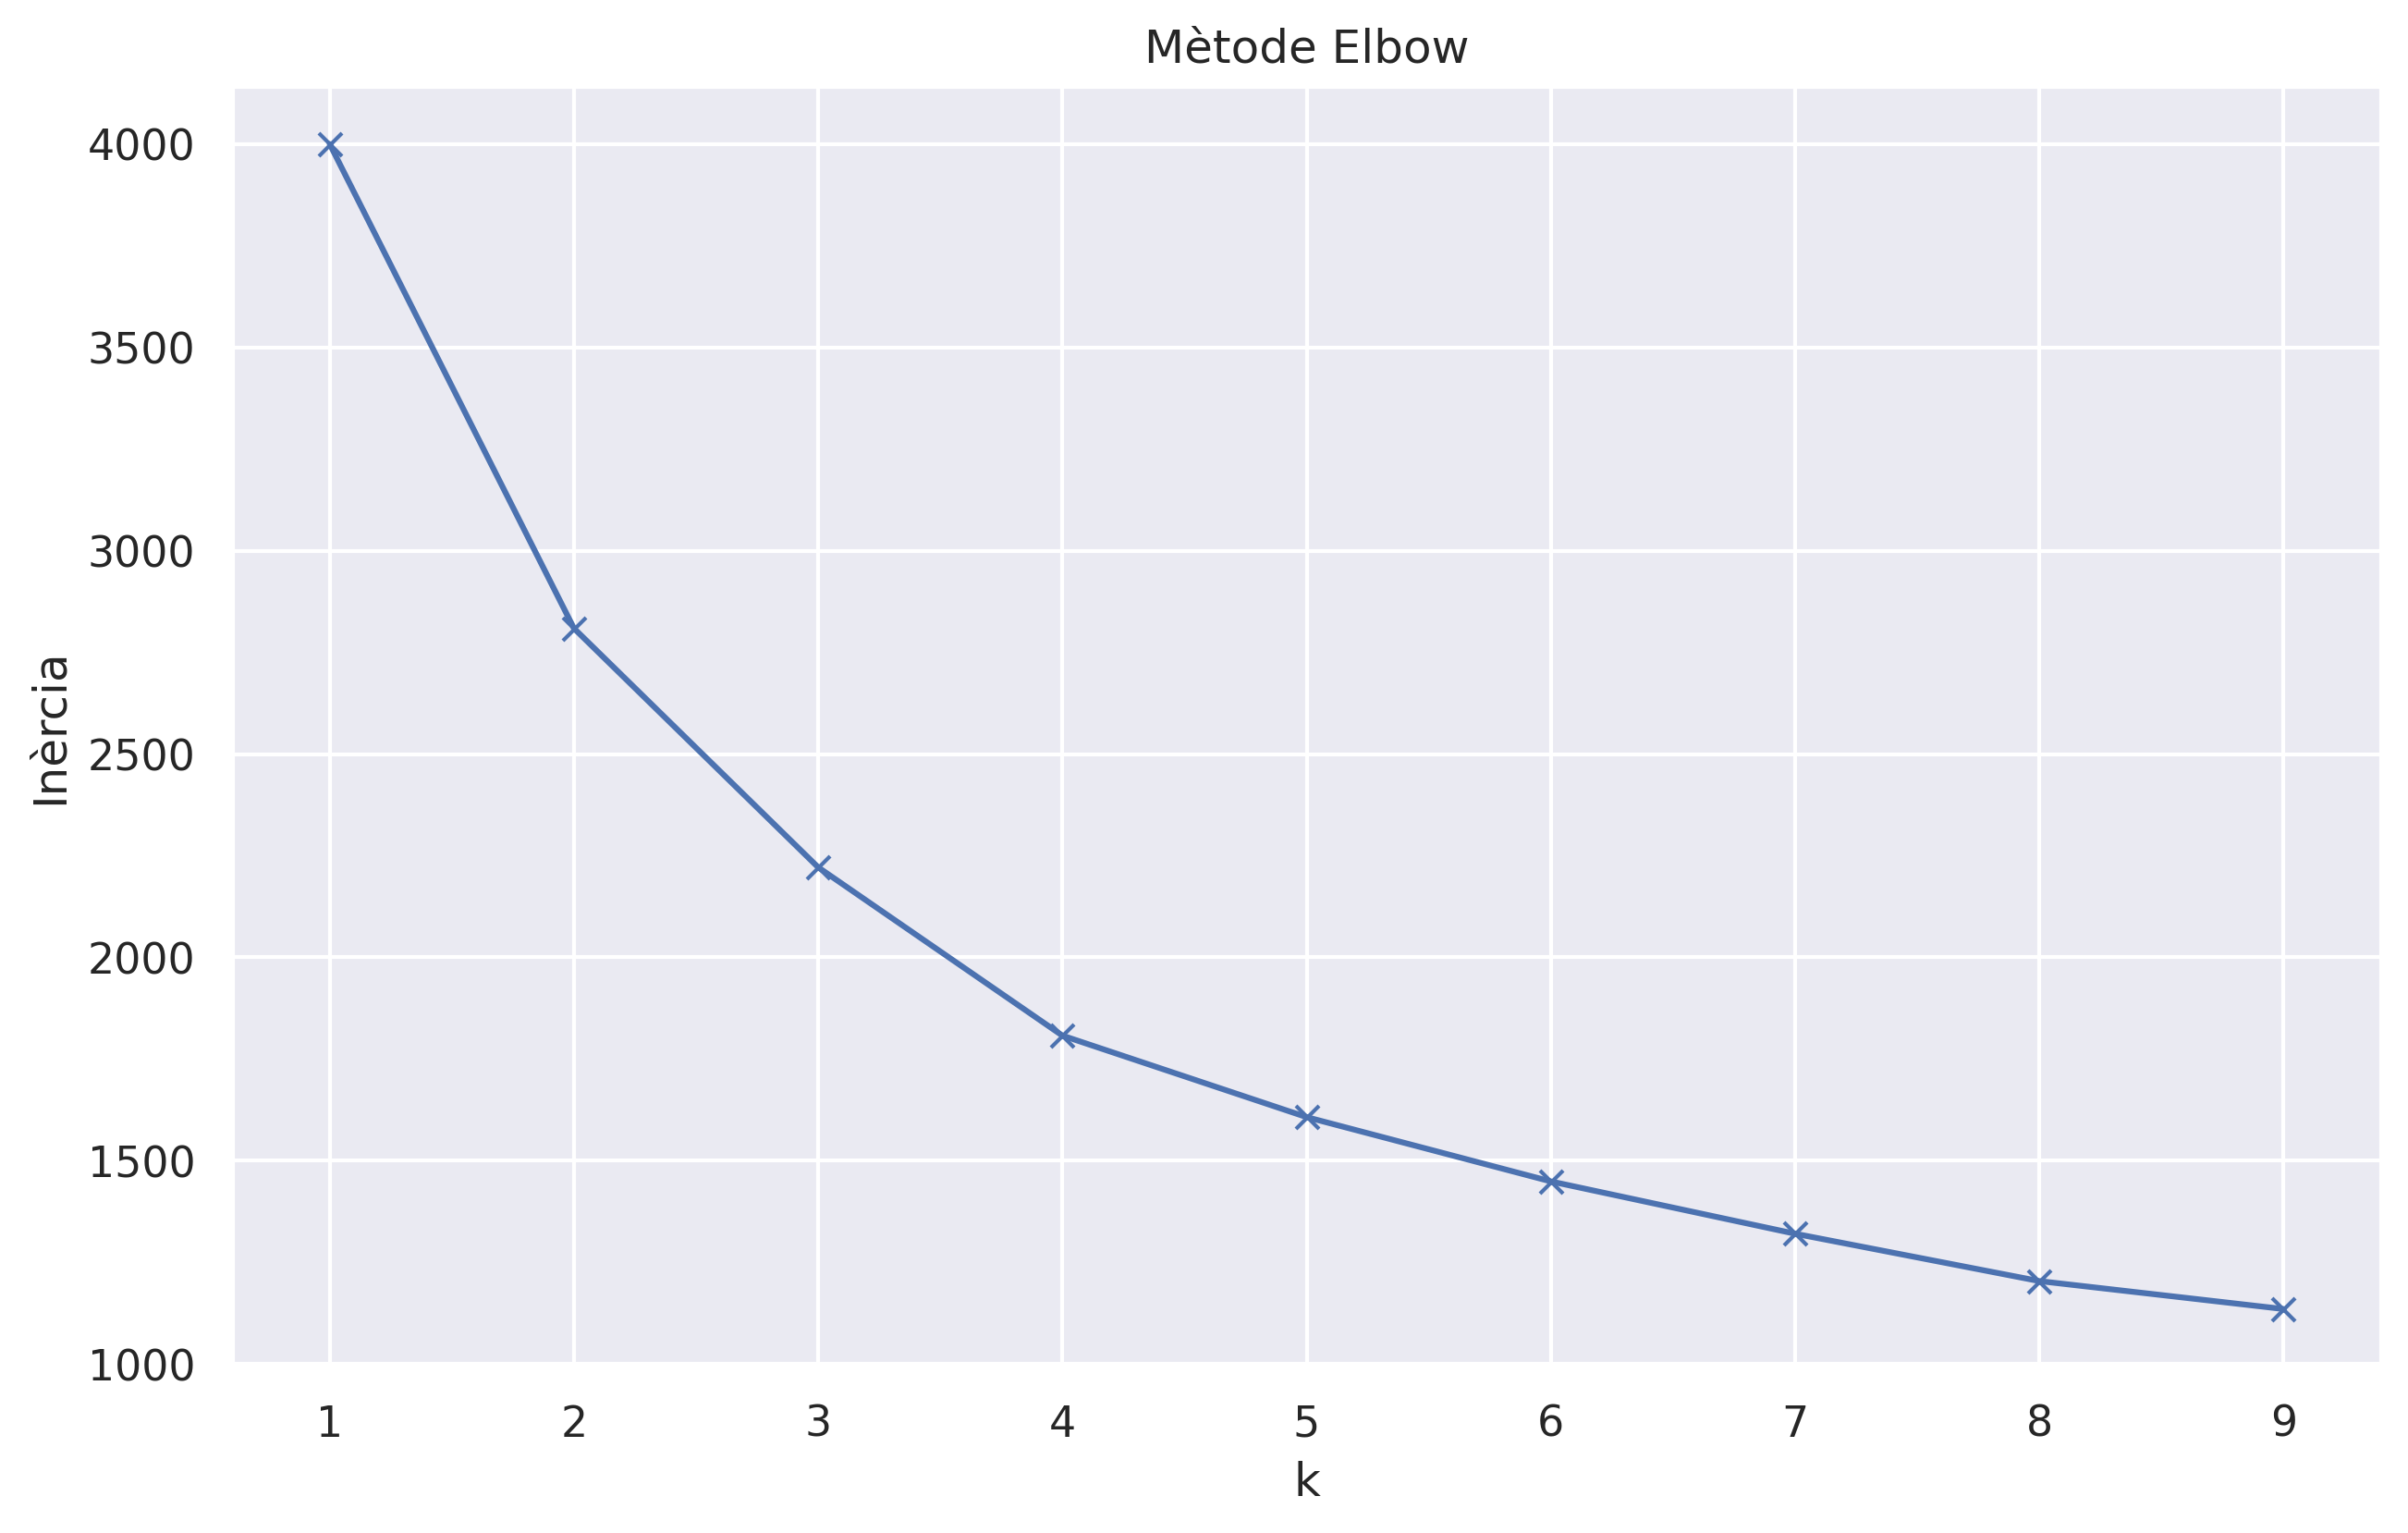

In [19]:
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inèrcia')
plt.title('Mètode Elbow')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

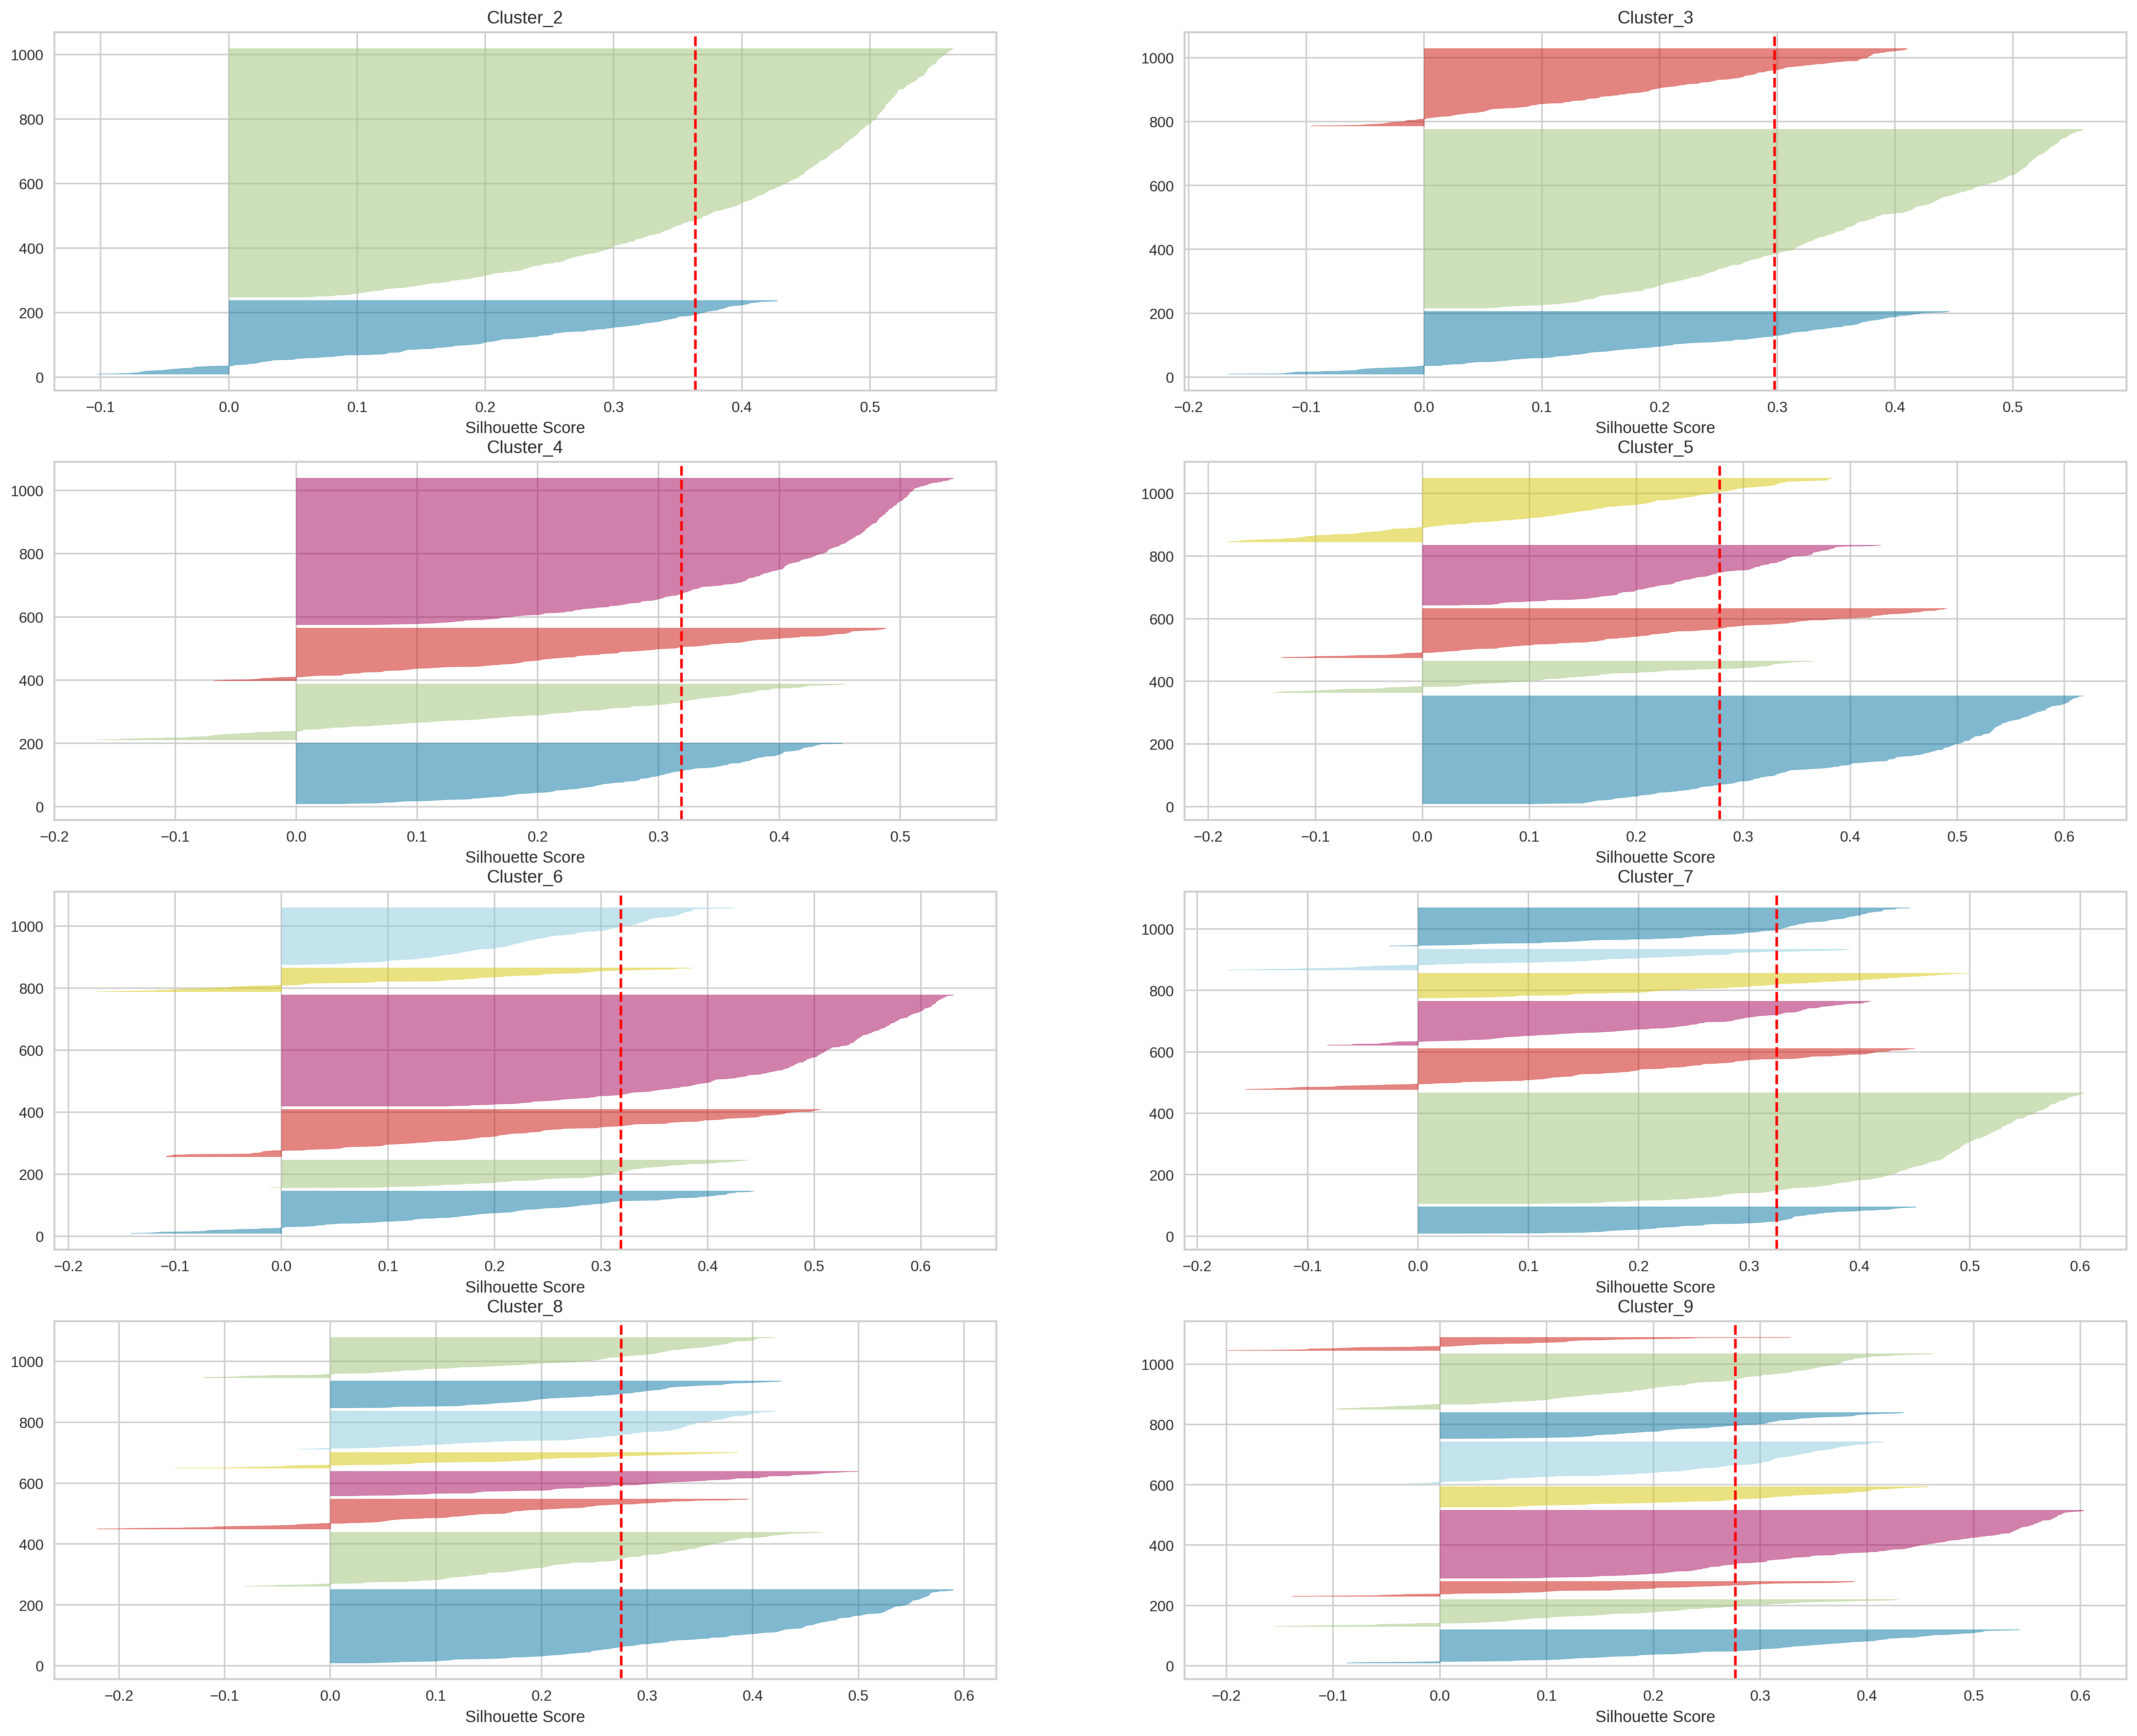

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                      ax=ax[q - 1][r])
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

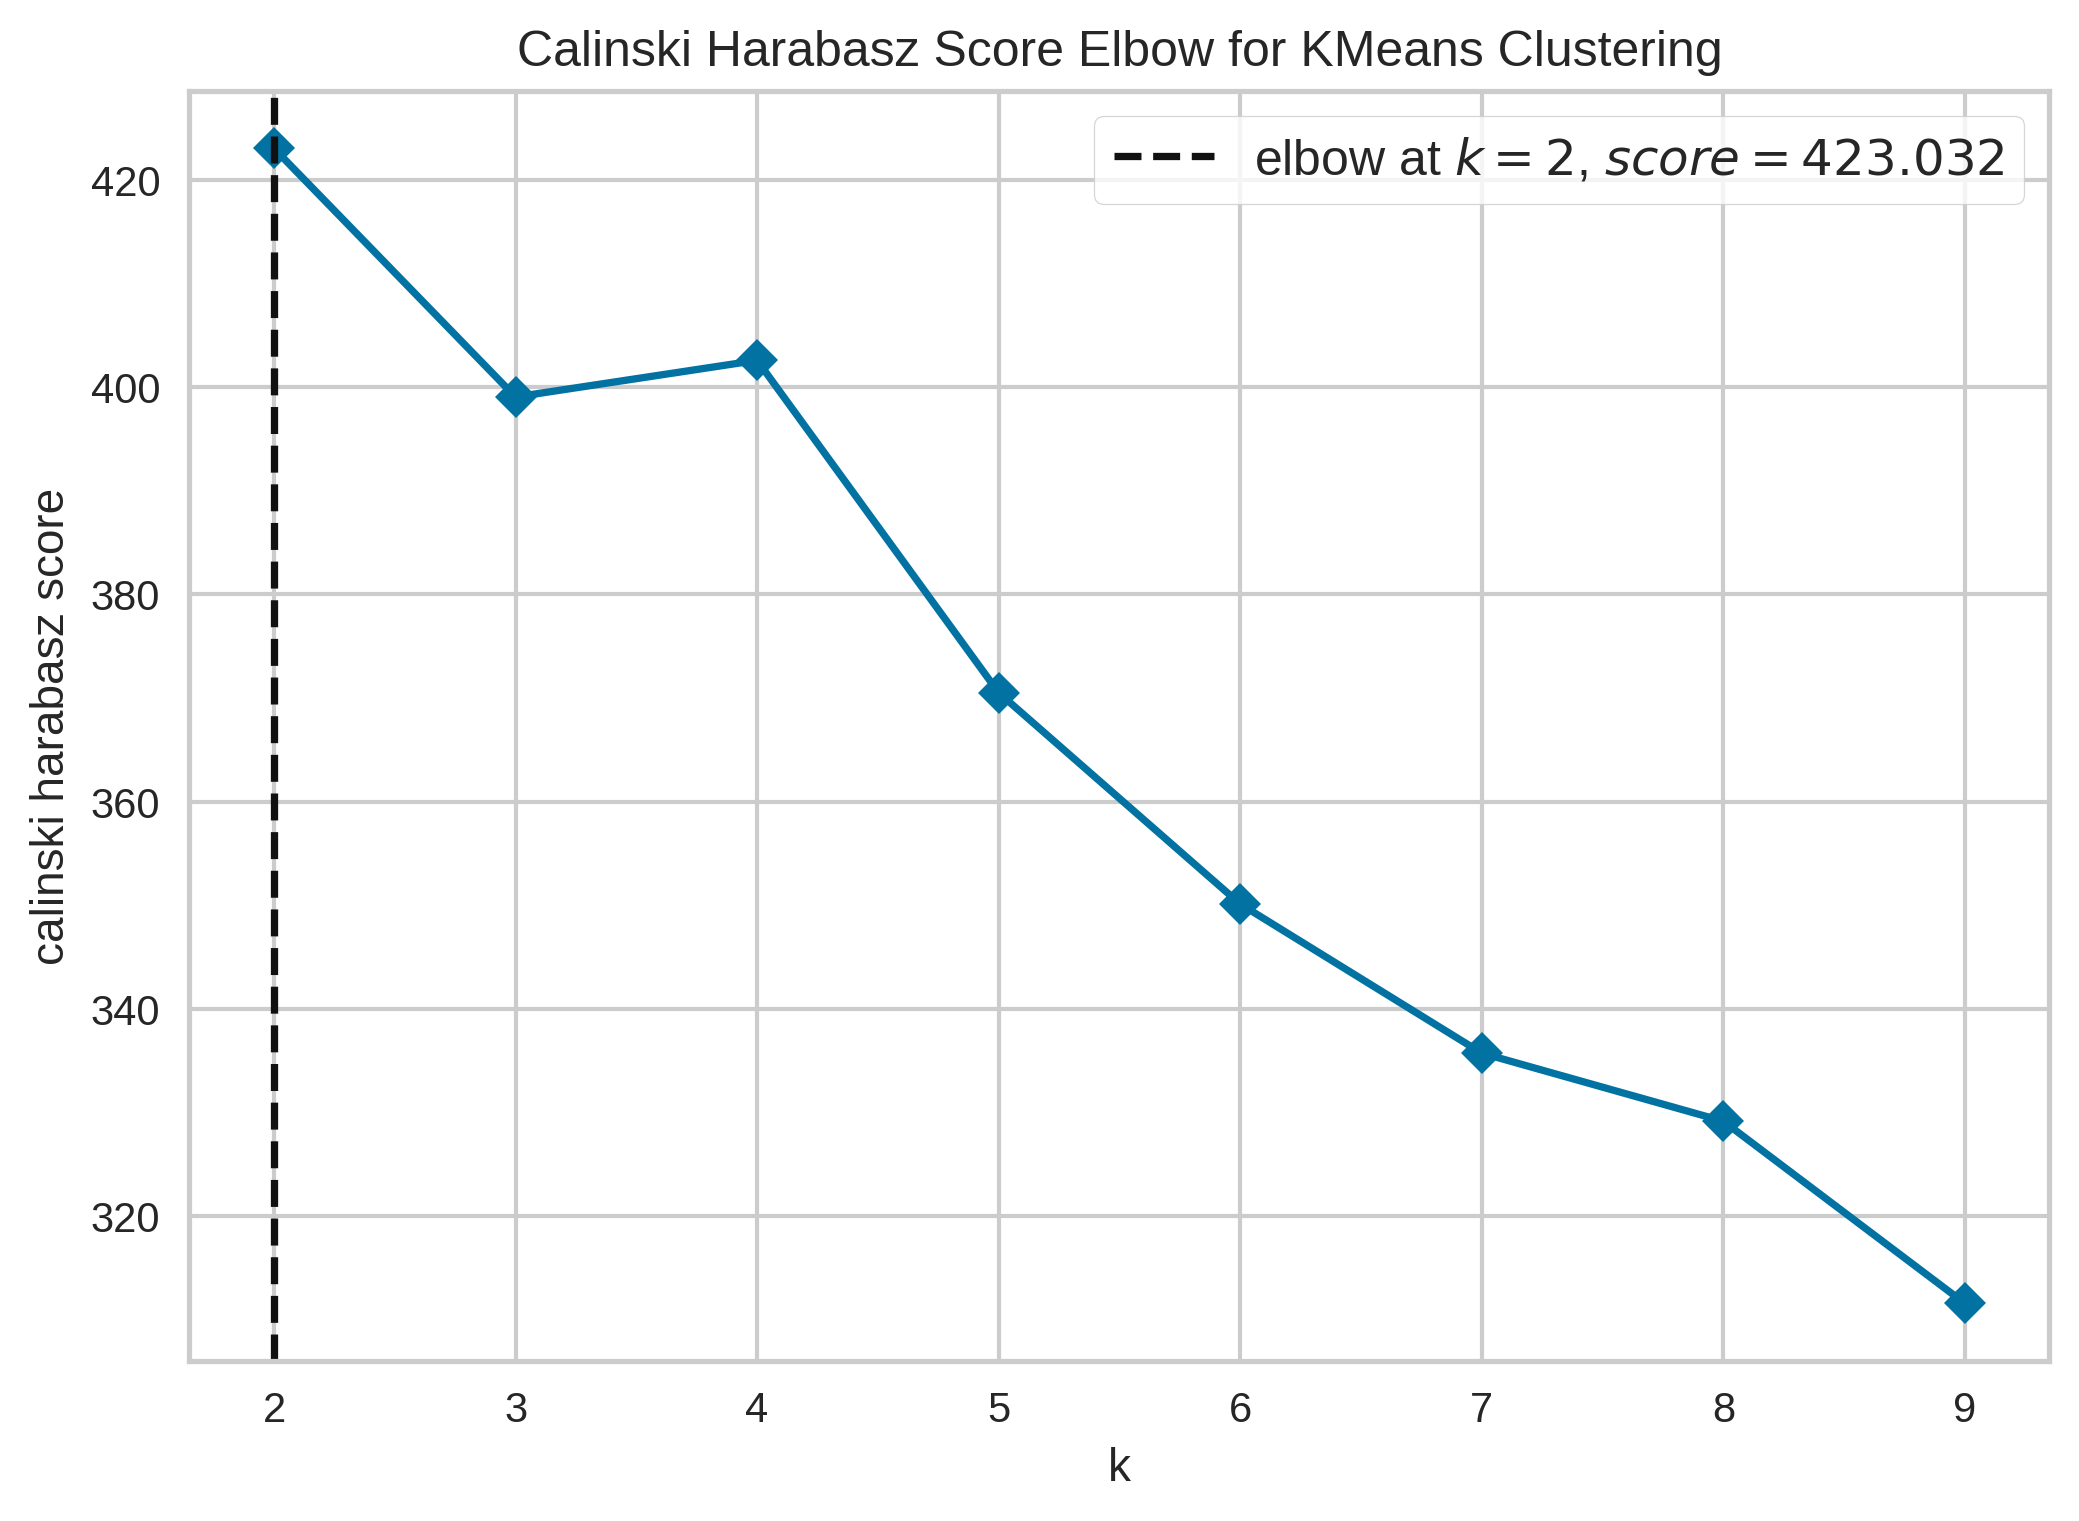

In [22]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10),
                              metric='calinski_harabasz',
                              timings=False)
visualizer.fit(scaled_credit)
visualizer.show();

In [23]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


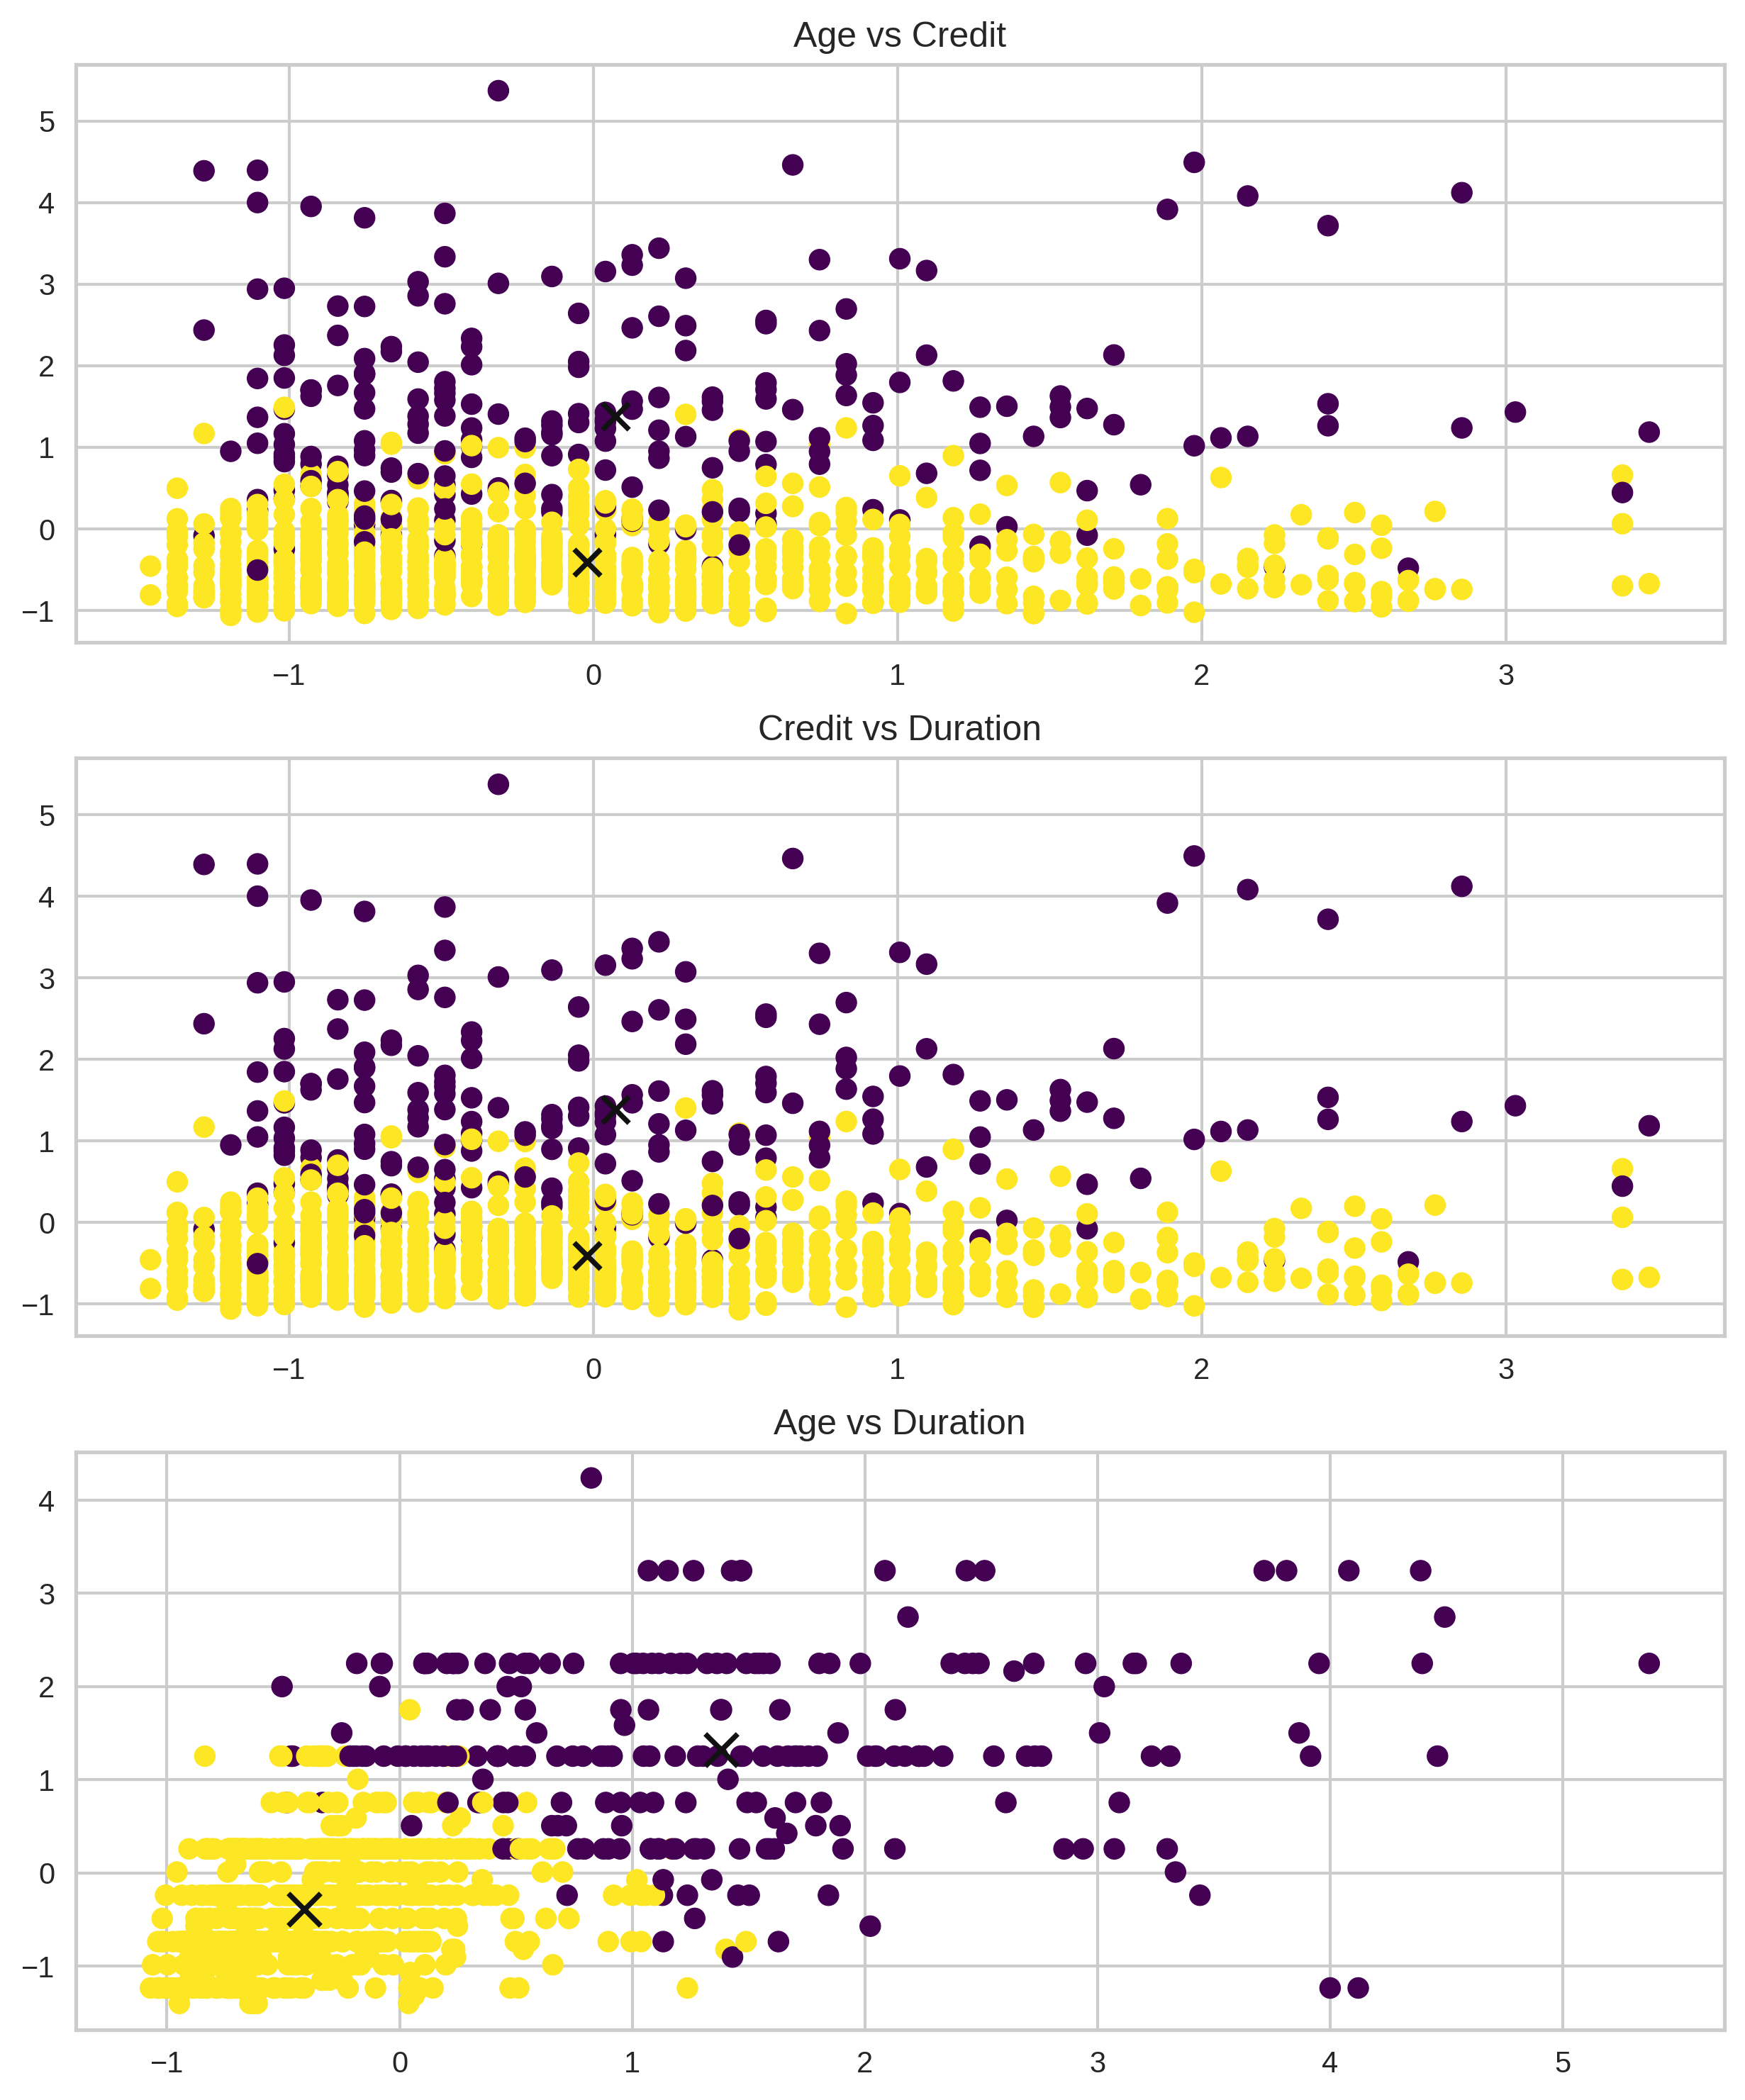

In [24]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Age vs Credit')
plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2],
            kmeans.cluster_centers_[:, 3], s = 120,
            marker= 'x', color = 'k')
plt.title('Age vs Duration')
plt.show()

In [25]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

In [26]:
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

In [27]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [28]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [29]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Clusters', 'Risk']

In [30]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()

,count
Risk,
good,124
bad,105


In [31]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()

,count
Risk,
good,576
bad,195


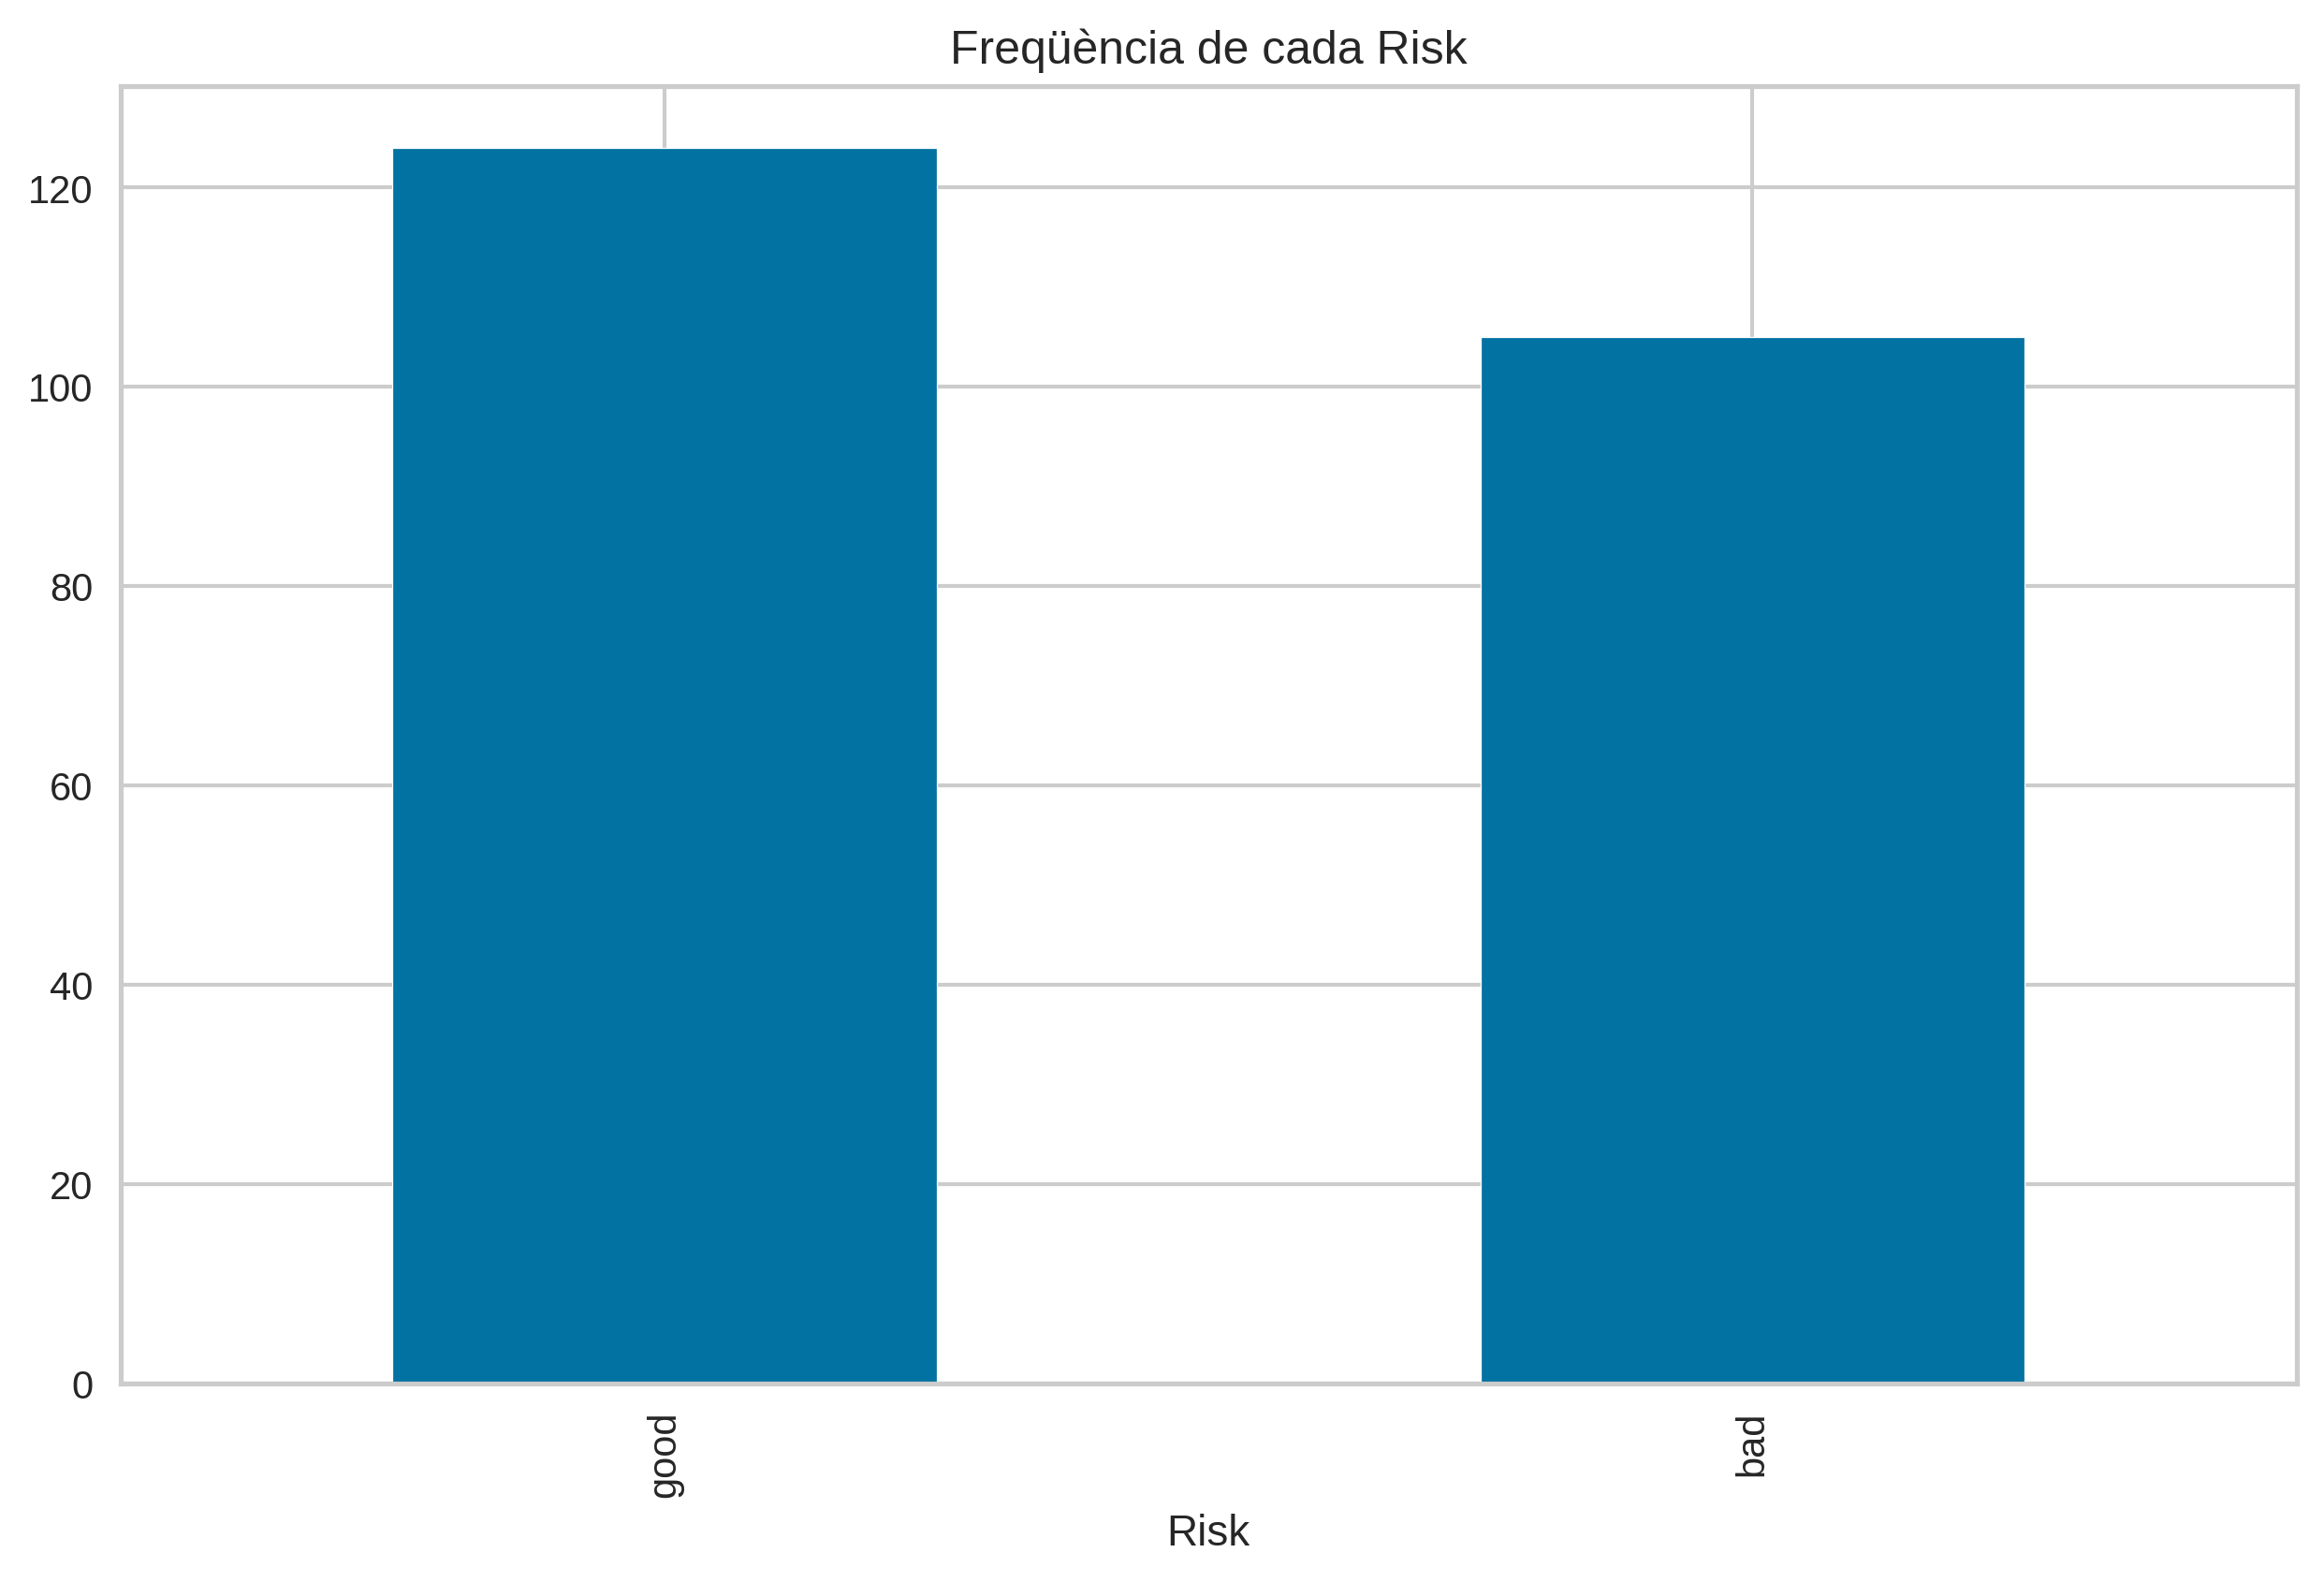

In [32]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Freqüència de cada Risk")
plt.show()

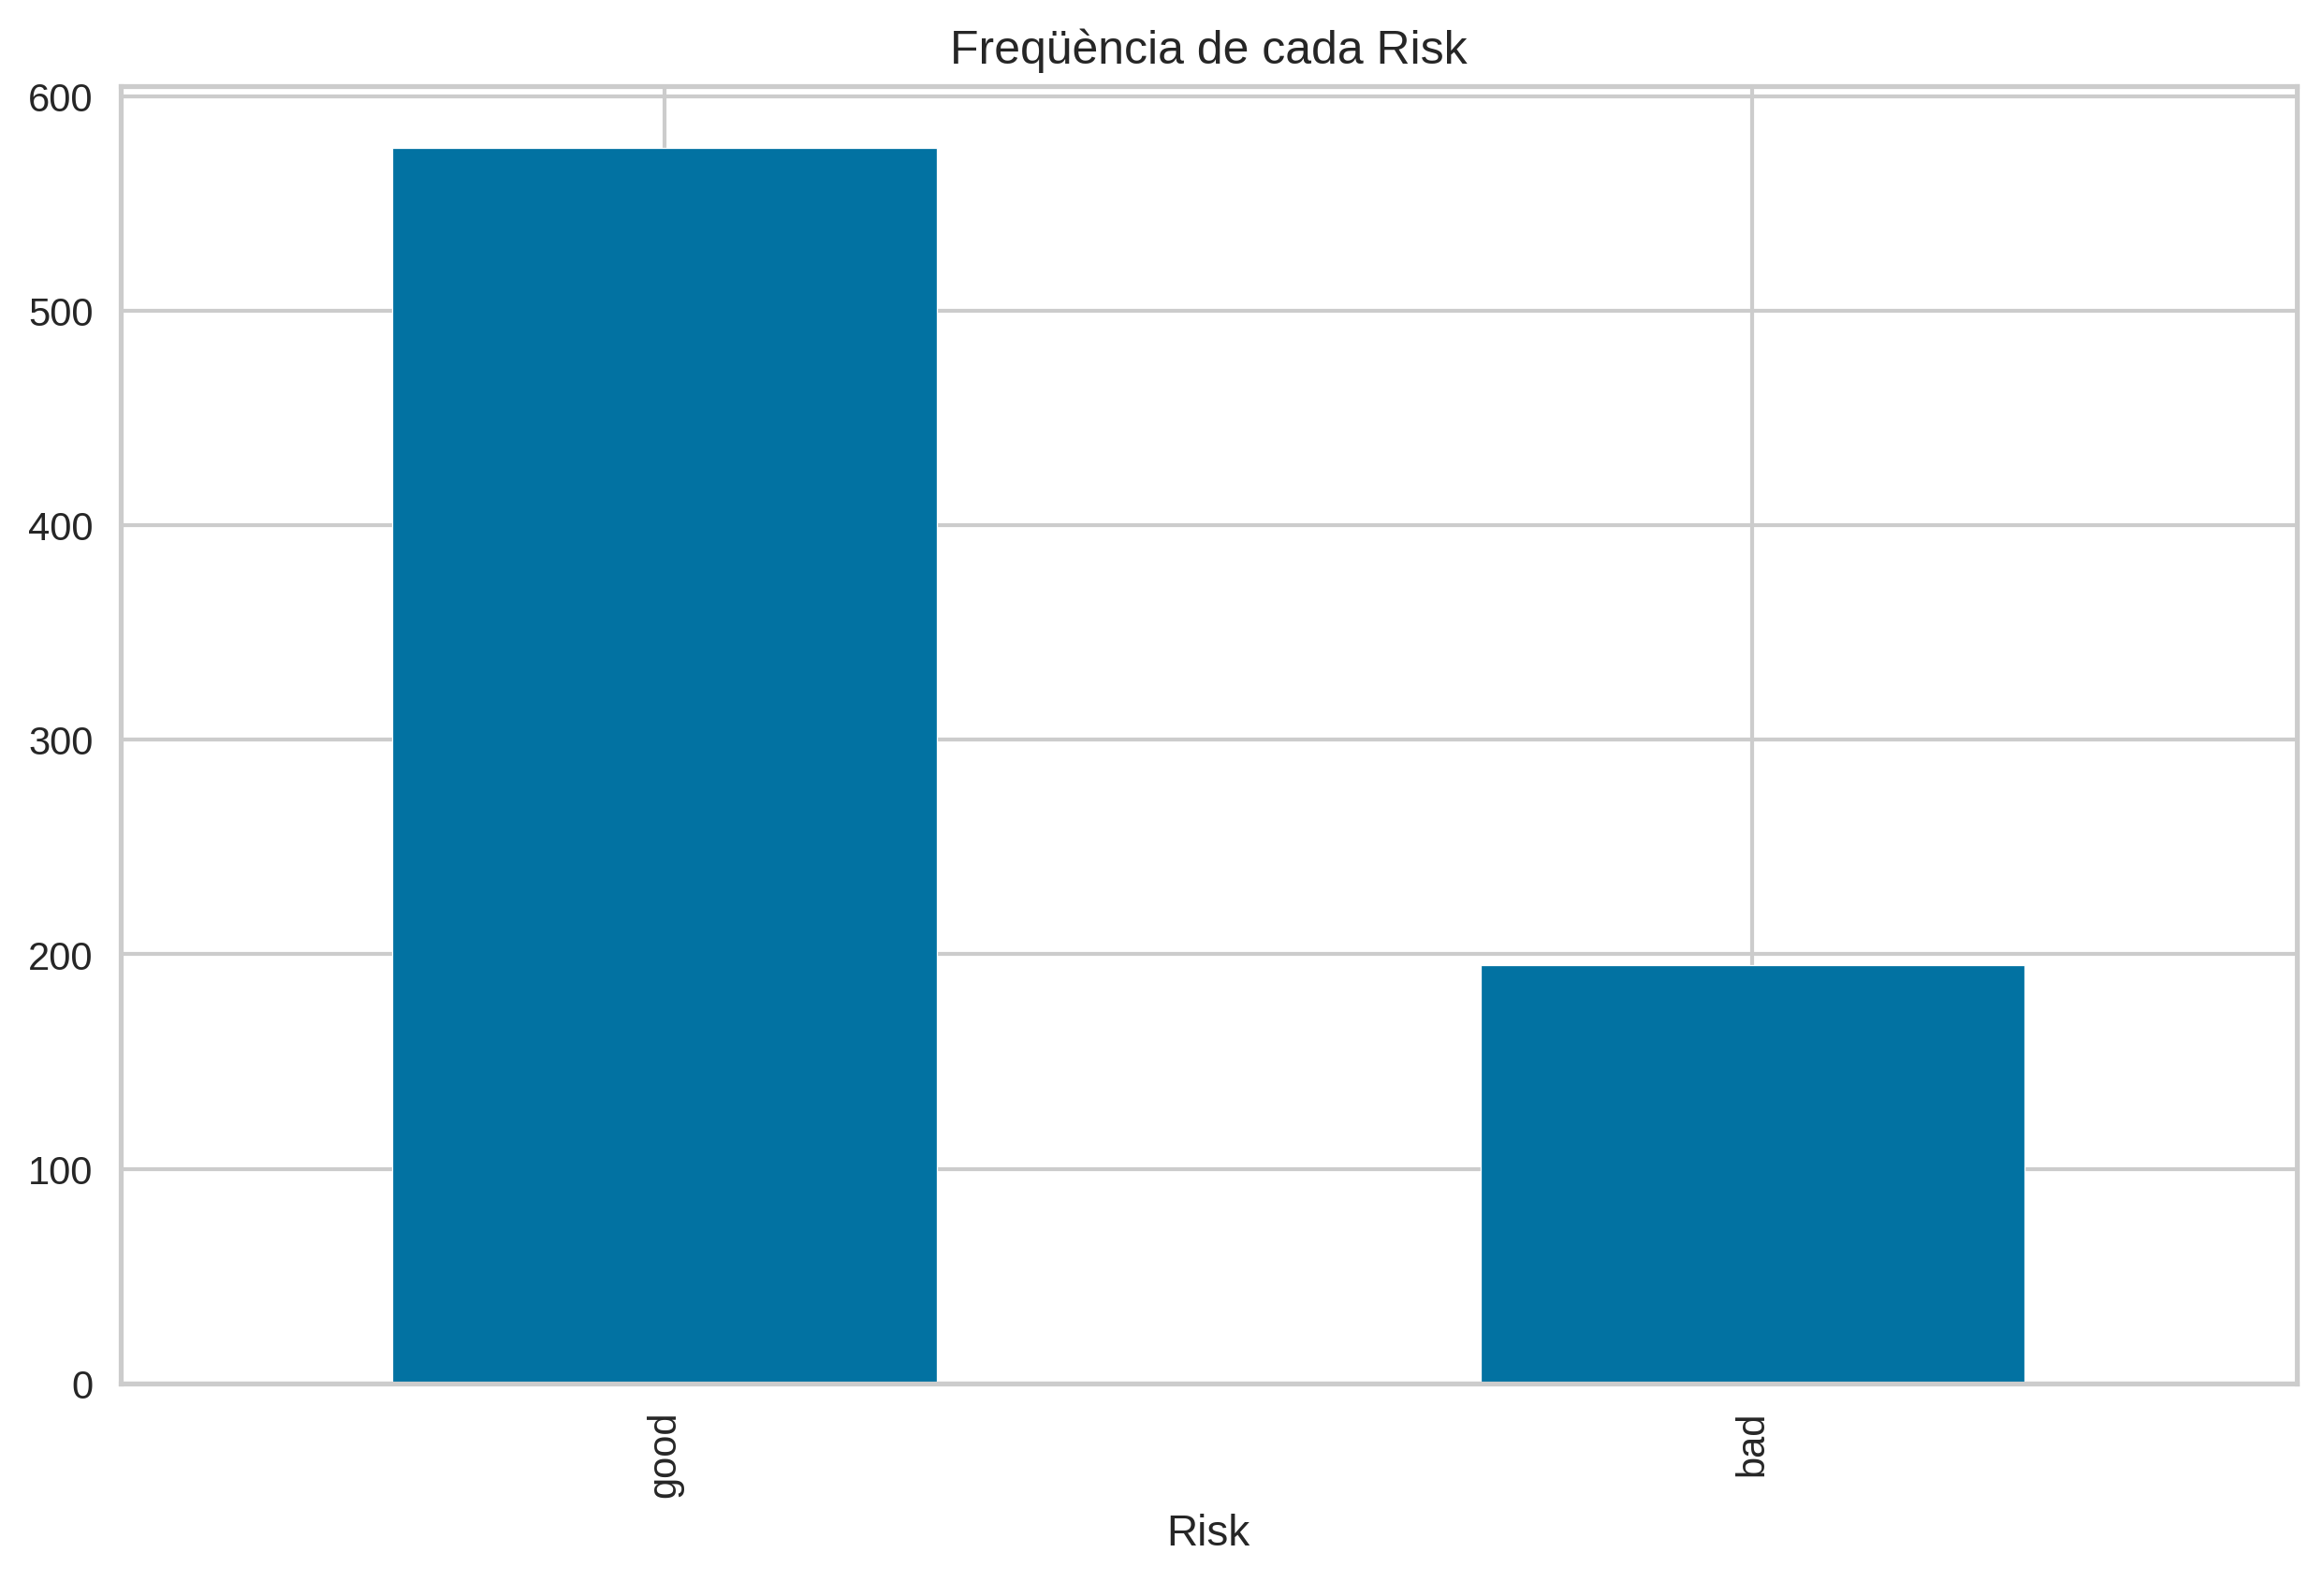

In [33]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Freqüència de cada Risk")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

In [36]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk', 'Clusters']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [38]:
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]

## Model de Regressió Logística per a la PD

In [39]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

In [40]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters == 0]['Risk']
smote = SMOTEENN(random_state = 2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
print(logit_fit1.summary())

Optimization terminated successfully.
         Current function value: 0.575443
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   49
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.1490
Time:                        14:52:57   Log-Likelihood:                -28.197
converged:                       True   LL-Null:                       -33.133
Covariance Type:            nonrobust   LLR p-value:                   0.01968
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -0.1496      0.331     -0.452      0.651      -0.798       0.499
Job               1.

In [41]:
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [42]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

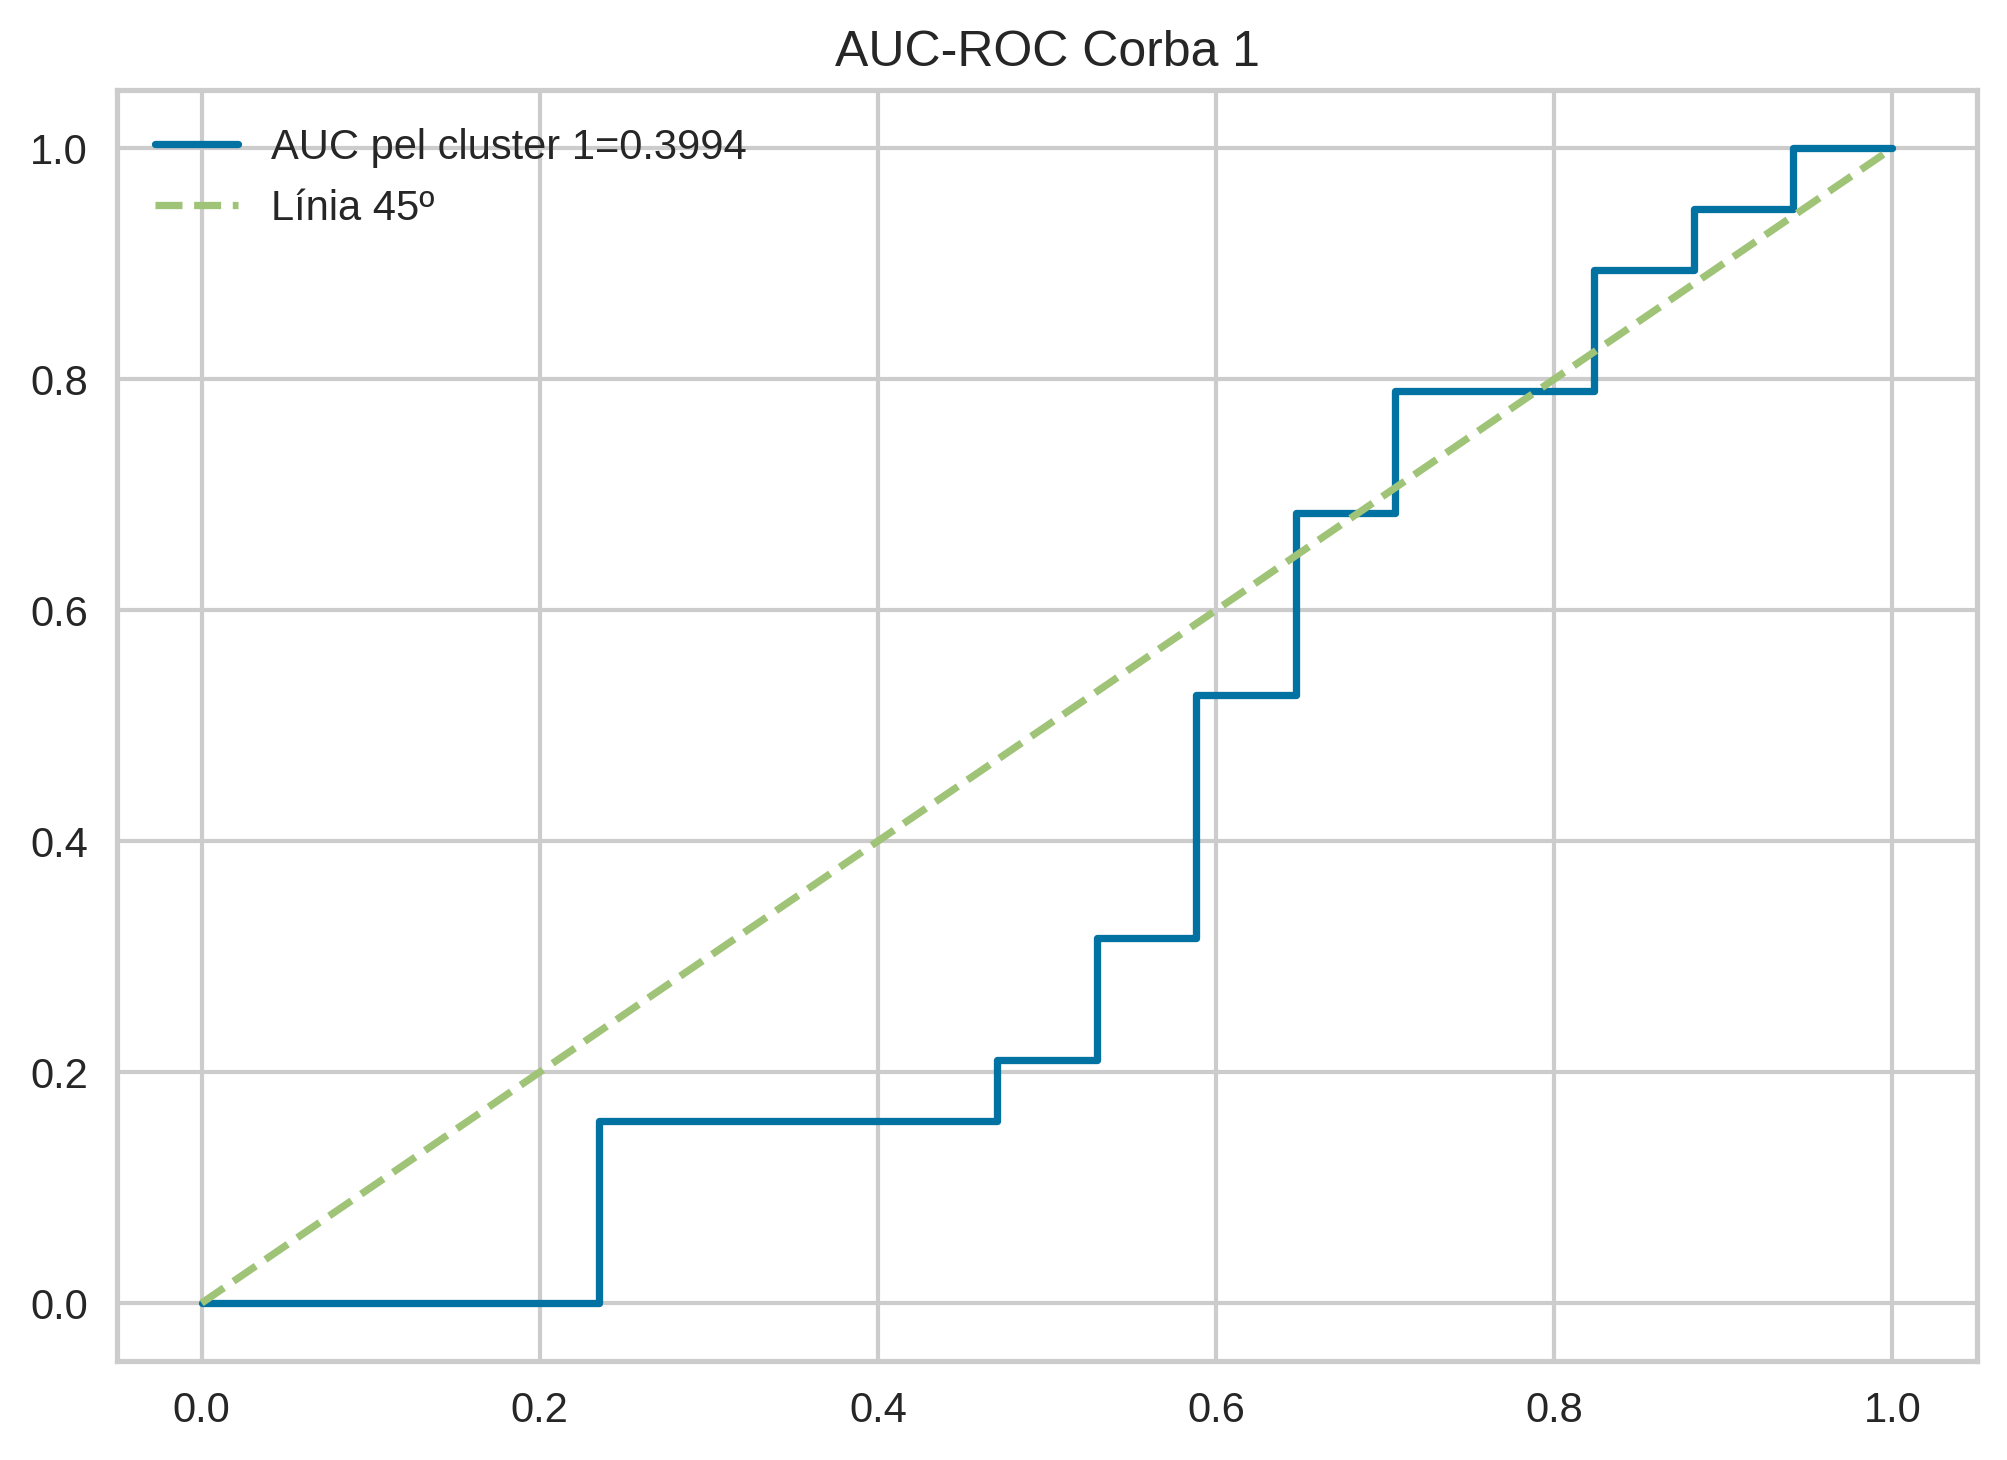

In [43]:
false_pos, true_pos, _ = roc_curve(y_test1.values,  pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos,true_pos, label="AUC pel cluster 1={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='Línia 45º')
plt.legend(loc='best')
plt.title('AUC-ROC Corba 1')
plt.show()

In [44]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters == 1]['Risk']
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

Optimization terminated successfully.
         Current function value: 0.603080
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  607
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                -0.06818
Time:                        14:53:08   Log-Likelihood:                -366.07
converged:                       True   LL-Null:                       -342.70
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.3933      0.098      4.023      0.000       0.202       0.585
Job              -0.

In [45]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters == 1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

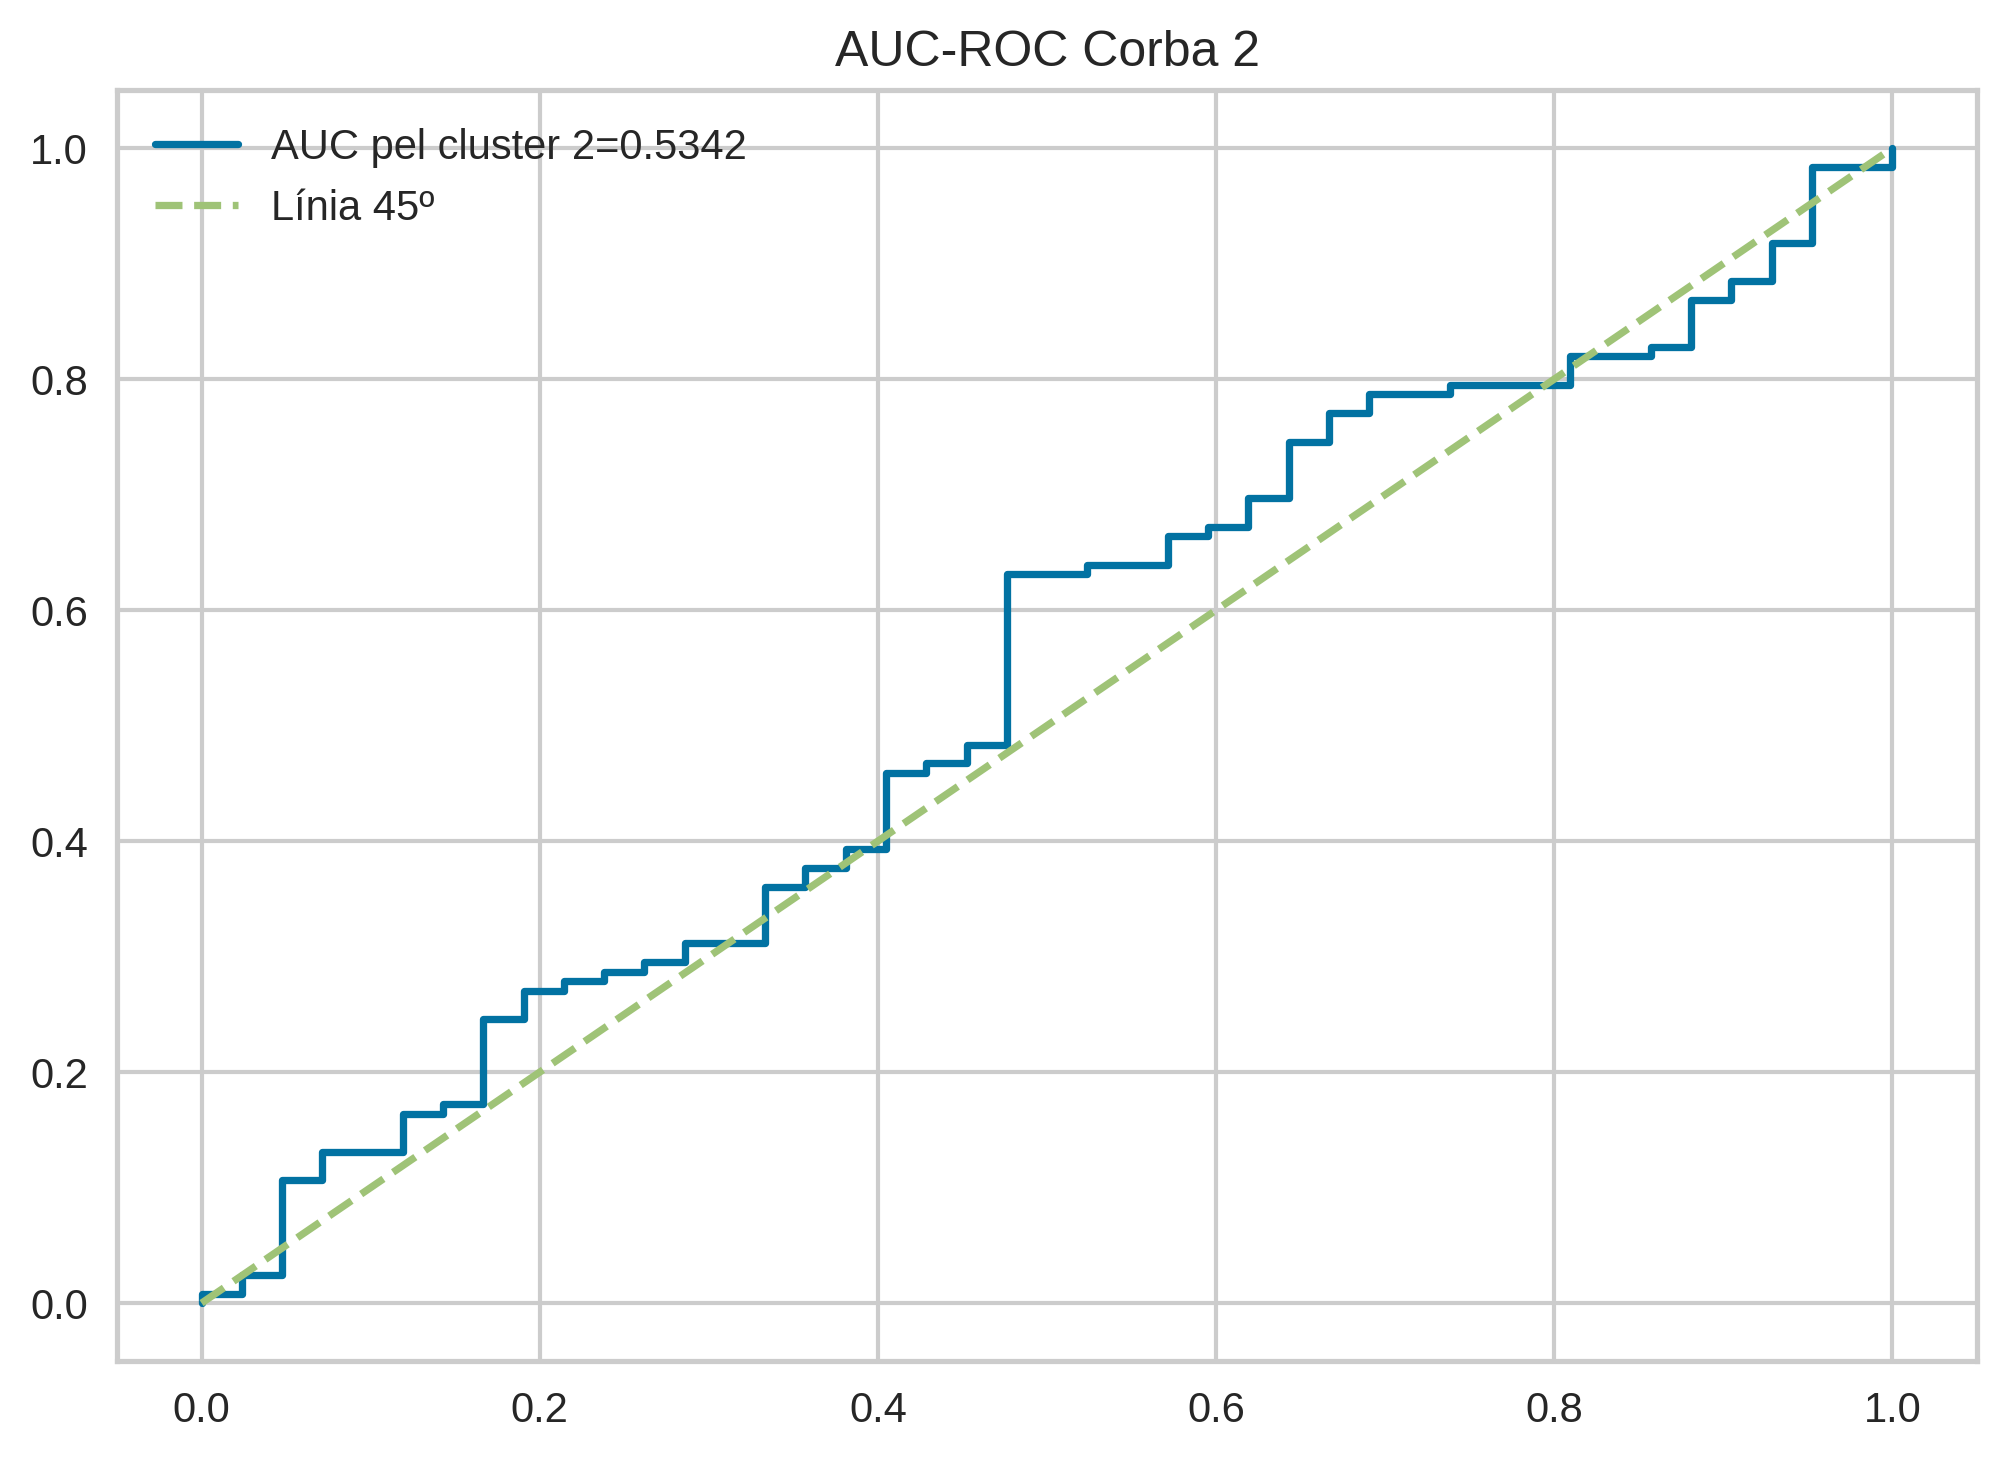

In [46]:
false_pos, true_pos, _ = roc_curve(y_test2.values,  pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos,true_pos,label="AUC pel cluster 2={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='Línia 45º')
plt.legend(loc='best')
plt.title('AUC-ROC Corba 2')
plt.show()

## Model SVC per a la PD

In [47]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time

In [48]:
param_svc = {'gamma': [1e-6, 1e-2],
             'C':[0.001,.09,1,5,10],
             'kernel':('linear','rbf')}

In [49]:
svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc,
                                  scoring = 'roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for first cluster in SVC 0.6833333333333333 with {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.09}


In [53]:
y_pred_SVC1 = halve_SVC.predict(X_test1)
print('Mètrica ROC-AUC pel primer cluster {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_SVC1)))

Mètrica ROC-AUC pel primer cluster 0.5000


In [54]:
halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for second cluster in SVC 0.675007326007326 with {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}


In [55]:
y_pred_SVC2 = halve_SVC.predict(X_test2)
print('Mètrica ROC-AUC pel segon cluster {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_SVC2)))

Mètrica ROC-AUC pel segon cluster 0.5156


## RF for PD Estimation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
param_rfc = {'n_estimators': [100, 300],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split':[5, 10]}

In [ ]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,
                                 scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

In [ ]:
y_pred_RF1 = halve_RF.predict(X_test1)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_RF1)))

In [ ]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

In [ ]:
y_pred_RF2 = halve_RF.predict(X_test2)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_RF2)))

## NN for PD Estimation

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
param_NN = {"hidden_layer_sizes": [(100, 50), (50, 50), (10, 100)],
            "solver": ["lbfgs", "sgd", "adam"],
            "learning_rate_init": [0.001, 0.05]}

In [ ]:
MLP = MLPClassifier(random_state=42)

In [ ]:
param_halve_NN = HalvingRandomSearchCV(MLP, param_NN,
                                       scoring = 'roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

In [ ]:
y_pred_NN1 = param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_NN1)))

In [ ]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

In [ ]:
y_pred_NN2 = param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_NN2)))

## DL for PD Estimation

In [ ]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal',
        activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal',
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal',
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [ ]:
parameters = {'batch_size':  [10, 50, 100],
          'epochs':  [50, 100, 150],
             'dropout_rate':[0.2, 0.4]}
model = KerasClassifier(build_fn = DL_risk)
gs = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'roc_auc')

In [ ]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

In [ ]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

In [ ]:
gs.fit(X_train2.values, y_train2.values, verbose=0)
print('Best parameters for second cluster in DL are {}'.
      format(gs.best_params_))

In [ ]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate= gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train2, y_train2)
DL_predict2 =  model.predict(X_test2)
DL_ROC_AUC = roc_auc_score(y_test2, DL_predict2.flatten())
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))